# Diabetes-Predictor    

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetching dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data
x = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.feature_selection import SelectKBest

In [4]:
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


 **DATA** **PREPROCESSING**

In [5]:
#Checking if there is any null value

x.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
x.duplicated().sum()

25772

In [7]:
x.shape

(253680, 21)

In [8]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [9]:
y.rename(columns = {'Diabetes_binary':'Diabetes'}, inplace = True)

<ipython-input-9-65f75704ec91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns = {'Diabetes_binary':'Diabetes'}, inplace = True)


In [10]:
y.head()

,Diabetes
0,0
1,0
2,0
3,0
4,0


In [11]:
#Joining features with target label y

df = pd.concat([x, y], axis=1)

In [12]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [13]:
#Checking correlation of every feature and target label with each other

df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.263129
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.200276
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.064761
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,0.216843
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.060789
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.105816
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.177282
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.118133
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,-0.040779
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087,-0.056584


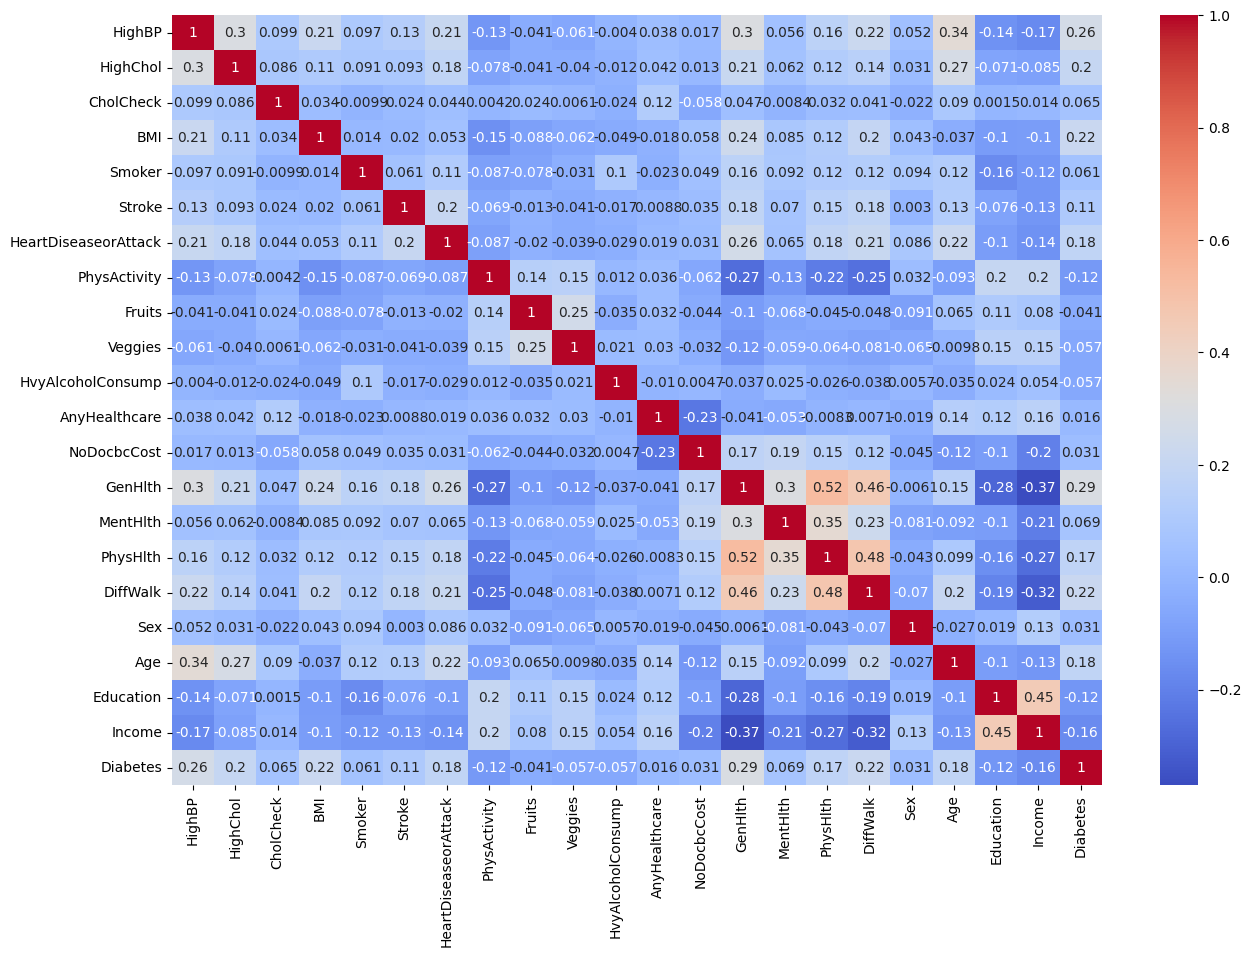

In [14]:
plt.figure(figsize=(15, 10))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

# displaying heatmap
plt.show()

In [15]:
df.corr()['Diabetes']

HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
GenHlth                 0.293569
MentHlth                0.069315
PhysHlth                0.171337
DiffWalk                0.218344
Sex                     0.031430
Age                     0.177442
Education              -0.124456
Income                 -0.163919
Diabetes                1.000000
Name: Diabetes, dtype: float64

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(x, y)

# Create a DataFrame with feature names and their chi-squared scores
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores.columns = ['Feature', 'Score']

# Sort the DataFrame by chi-squared scores in descending order
f_Scores_sorted = f_Scores.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
f_Scores_sorted


,Feature,Score
15,PhysHlth,133424.406534
14,MentHlth,21029.632228
3,BMI,18355.166400
16,DiffWalk,10059.506391
0,HighBP,10029.013935
13,GenHlth,9938.507776
18,Age,9276.141199
6,HeartDiseaseorAttack,7221.975378
1,HighChol,5859.710582
20,Income,4829.816361


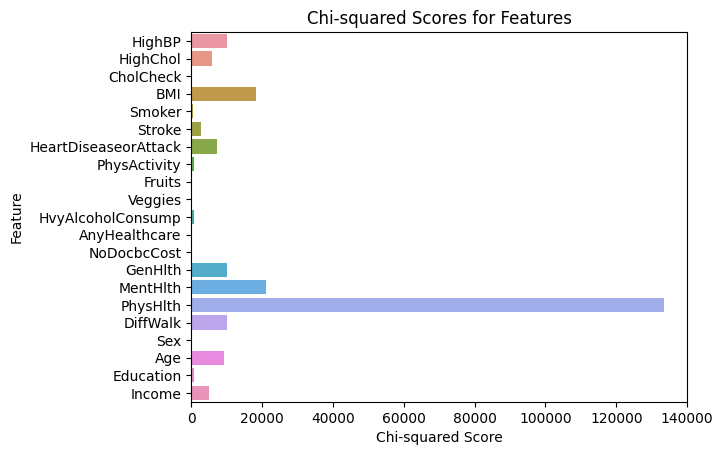

In [17]:
#Plotting F-score

sns.barplot(x='Score', y='Feature', data=f_Scores, orient='h')
plt.title('Chi-squared Scores for Features')
plt.xlabel('Chi-squared Score')
plt.ylabel('Feature')
plt.show()


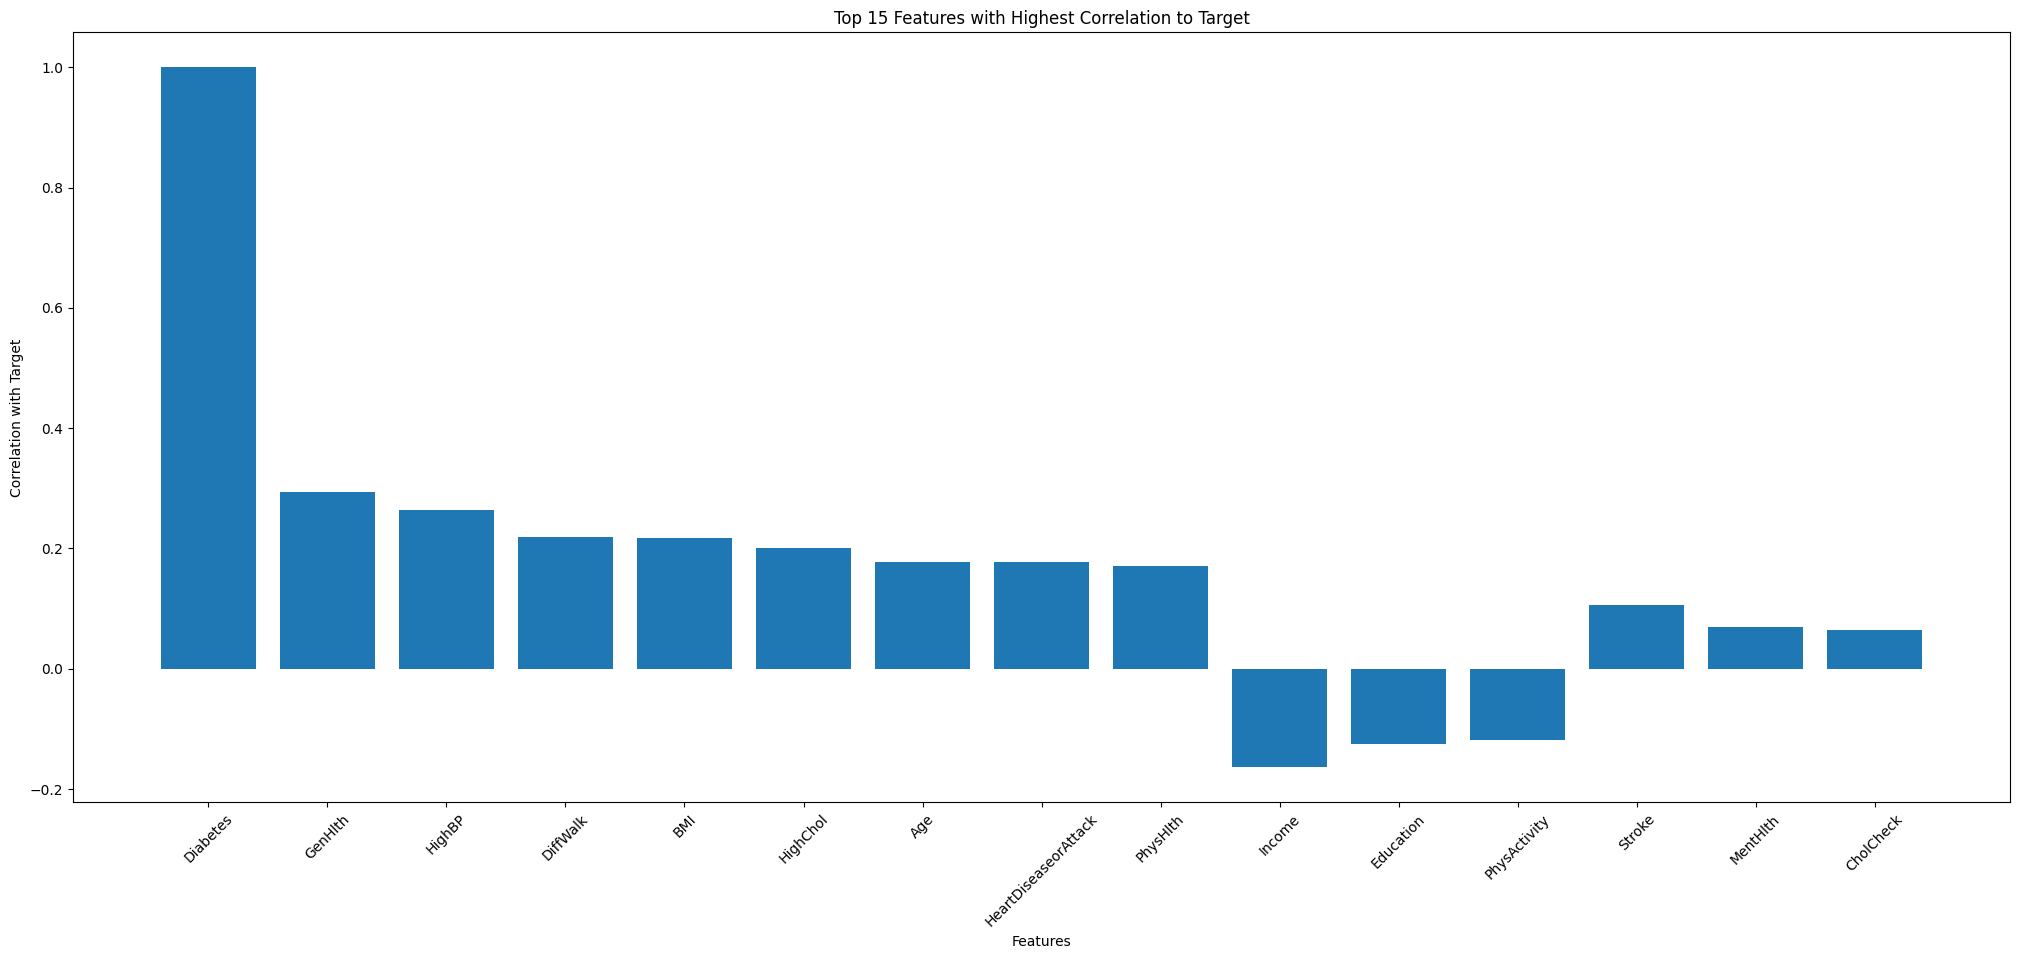

In [18]:
correlations = df.corr()['Diabetes']
top_15_features = correlations.abs().nlargest(15).index
top_15_corr_values = correlations[top_15_features]
top_15_features
plt.figure(figsize=(25, 10))
plt.bar(top_15_features, top_15_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 15 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [19]:
df.drop(columns=['CholCheck','Smoker','Stroke','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','Fruits','Veggies','HvyAlcoholConsump','Education','Income'], axis=1,inplace=True)

In [20]:
df.head()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,PhysHlth,DiffWalk,Sex,Age,Diabetes
0,1,1,40,0,0,15,1,0,9,0
1,0,0,25,0,1,0,0,0,7,0
2,1,1,28,0,0,30,1,0,9,0
3,1,0,27,0,1,0,0,0,11,0
4,1,1,24,0,1,0,0,0,11,0


In [21]:
df.describe()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,PhysHlth,DiffWalk,Sex,Age,Diabetes
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,28.382364,0.094186,0.756544,4.242081,0.168224,0.440342,8.032119,0.139333
std,0.494934,0.494210,6.608694,0.292087,0.429169,8.717951,0.374066,0.496429,3.054220,0.346294
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,1.000000,1.000000,31.000000,0.000000,1.000000,3.000000,0.000000,1.000000,10.000000,0.000000
max,1.000000,1.000000,98.000000,1.000000,1.000000,30.000000,1.000000,1.000000,13.000000,1.000000


**EDA(EXPLORATORY DATA ANALYSIS)**




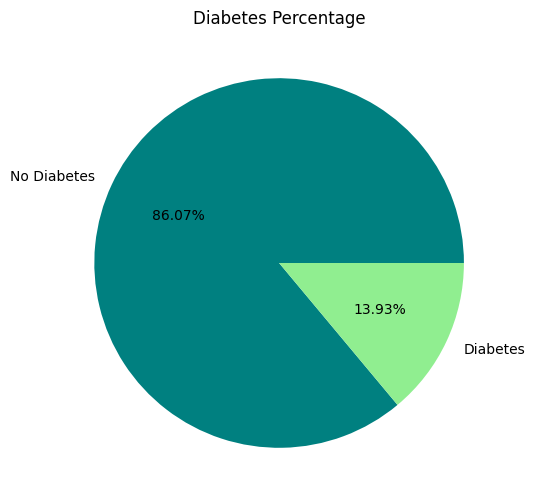

In [22]:
#Pie chart to show Diabetes Percentage
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['teal', 'lightgreen'])
plt.title('Diabetes Percentage')
plt.show()

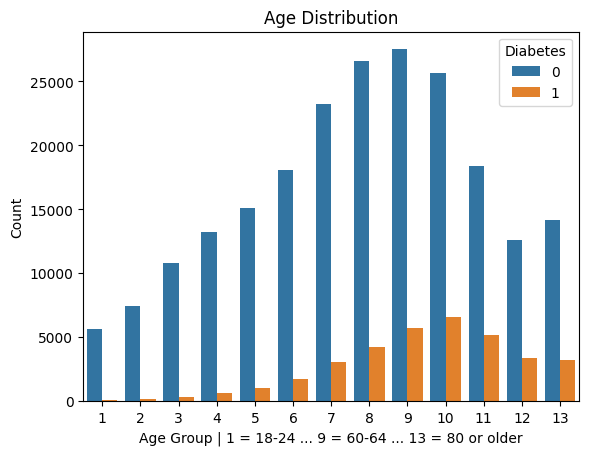

In [23]:
# Age group distribution
sns.countplot(x='Age', data=df, hue='Diabetes')
plt.title('Age Distribution')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')
plt.show()


In [24]:
# Split Diabetics
Diabetics = df.where(df.Diabetes == 1)

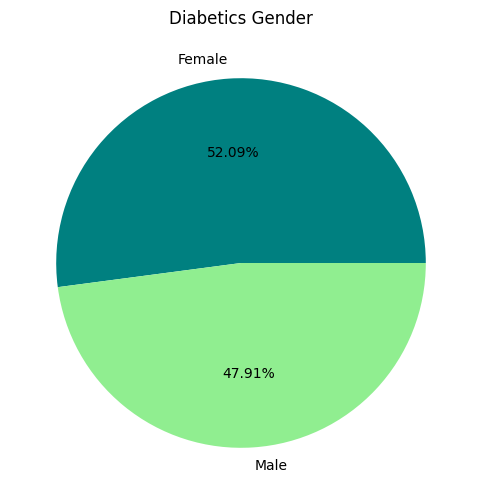

In [25]:
# Plot pie chart to show sex distribution of Diabetes patients
plt.figure(figsize=(10,6))
plt.pie(Diabetics['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%',colors=['teal', 'lightgreen'])
plt.title('Diabetics Gender')
plt.show()

Text(0.5, 1.0, 'High Cholesterol in Diabetes pation')

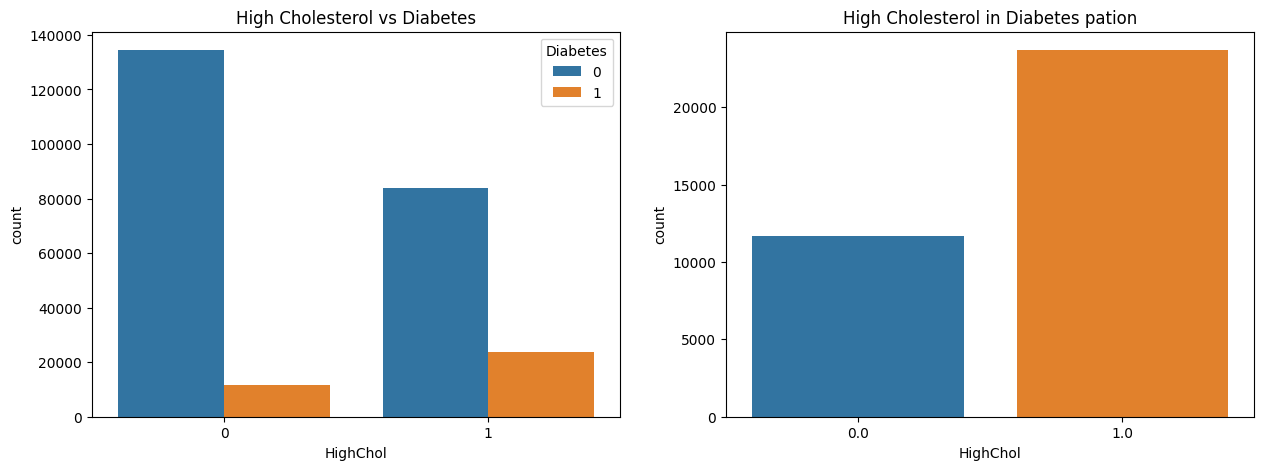

In [26]:
# HighChol and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=df, hue='Diabetes', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes pation')

Text(0.5, 1.0, 'Difficulty in walking or climbing in Diabetes pation')

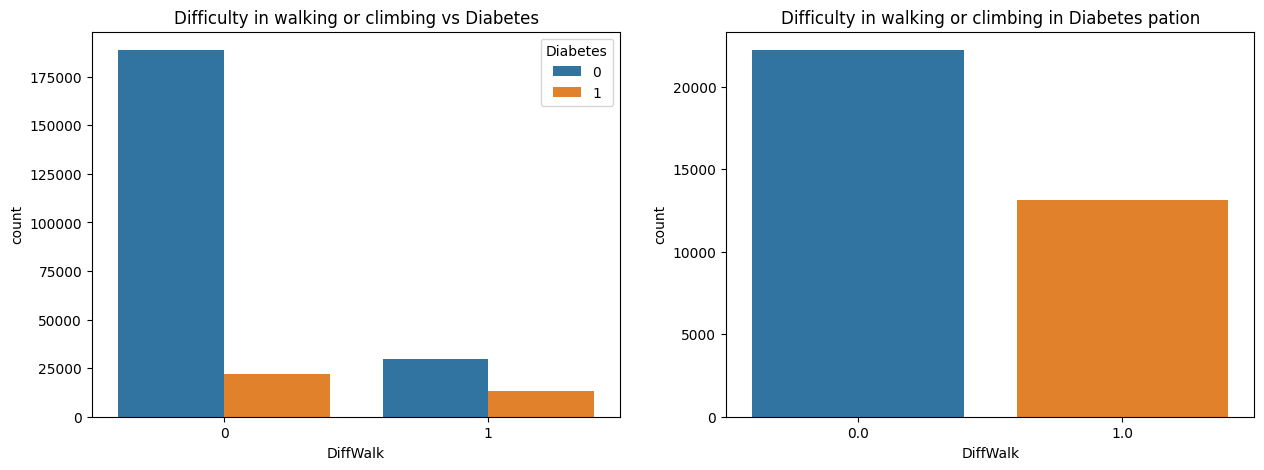

In [27]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes', ax=ax[0]).set_title('Difficulty in walking or climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=Diabetics, ax=ax[1]).set_title('Difficulty in walking or climbing in Diabetes pation')

Text(0.5, 1.0, 'High blood pressure in Diabetes pation')

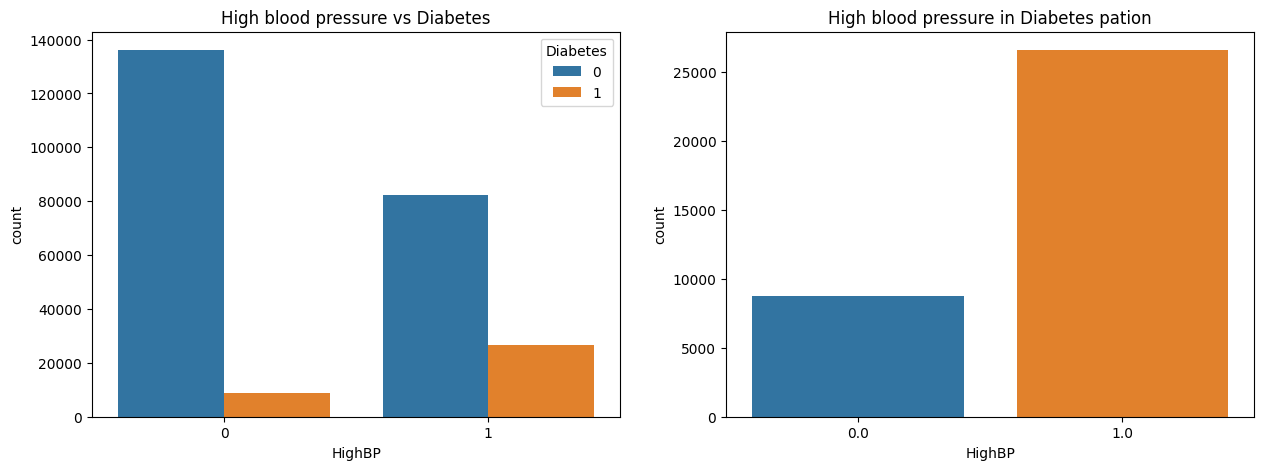

In [28]:
# HighBP and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighBP', data=df, hue='Diabetes', ax=ax[0]).set_title('High blood pressure vs Diabetes')
sns.countplot(x='HighBP', data=Diabetics, ax=ax[1]).set_title('High blood pressure in Diabetes pation')

Text(0.5, 1.0, 'PhysActivity in Diabetes pation')

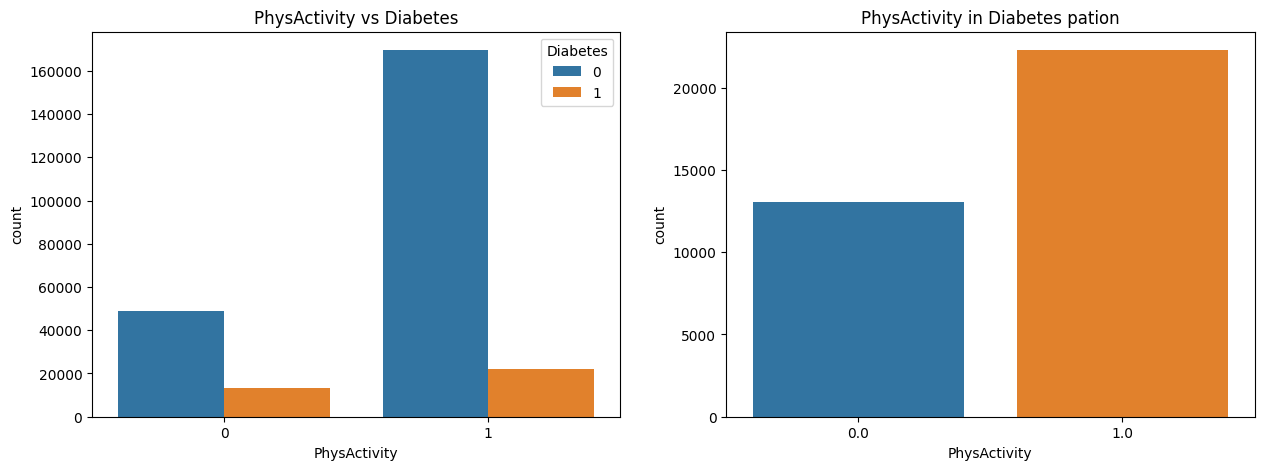

In [29]:
# PhysActivity and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='PhysActivity', data=df, hue='Diabetes', ax=ax[0]).set_title('PhysActivity vs Diabetes')
sns.countplot(x='PhysActivity', data=Diabetics, ax=ax[1]).set_title('PhysActivity in Diabetes pation')

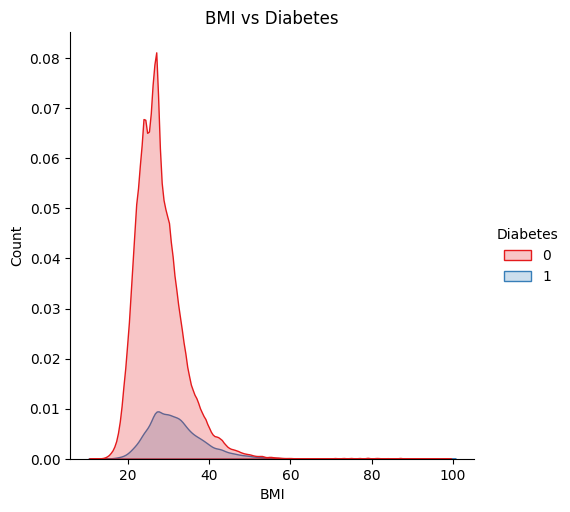

In [30]:
# BMI and Diabetes
sns.displot(df, x="BMI", hue="Diabetes", kind="kde", fill=True, palette = "Set1")
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'BMI vs Diabetes')

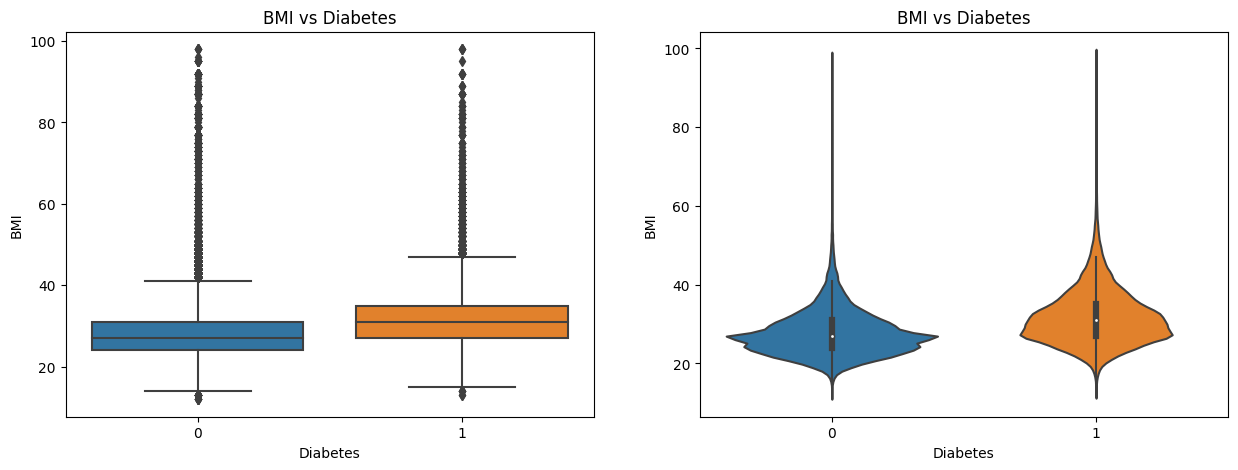

In [31]:
#box plot of BMI vs Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax[0]).set_title('BMI vs Diabetes')
sns.violinplot(x='Diabetes', y='BMI', data=df, ax=ax[1]).set_title('BMI vs Diabetes')

 **MODEL TRAINING**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

**Logistic** **Regression**

Logistic Regression Model:
- Train Accuracy: 0.8620
- Test Accuracy: 0.8639



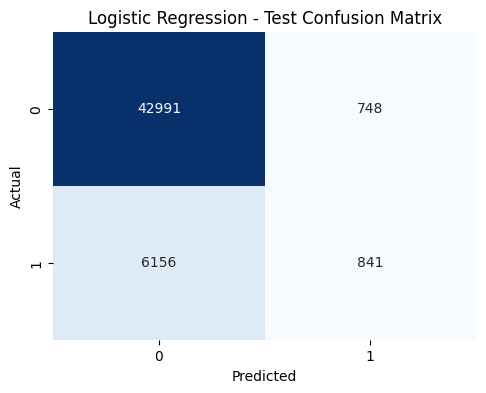

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)

train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

print("Logistic Regression Model:")
print("- Train Accuracy: {:.4f}".format(train_accuracy_logistic))
print("- Test Accuracy: {:.4f}\n".format(test_accuracy_logistic))


# Confusion Matrix
cm_test_logistic = confusion_matrix(y_test, y_test_pred_logistic)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

**Decision Trees**

 Decision Tree Model:
- Train Accuracy: 0.9148
- Test Accuracy: 0.8395



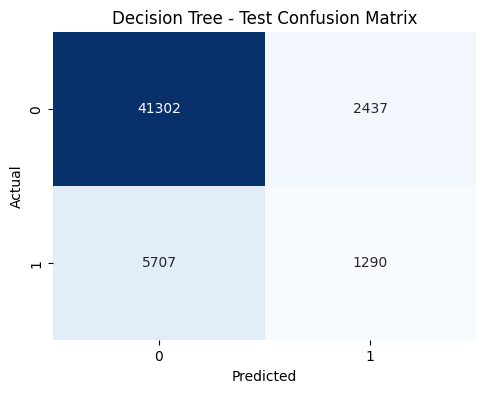

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print(" Decision Tree Model:")
print("- Train Accuracy: {:.4f}".format(train_accuracy_dt))
print("- Test Accuracy: {:.4f}\n".format(test_accuracy_dt))

# Confusion Matrix
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Random Forest Model:
- Train Accuracy: 0.9148
- Test Accuracy: 0.8466



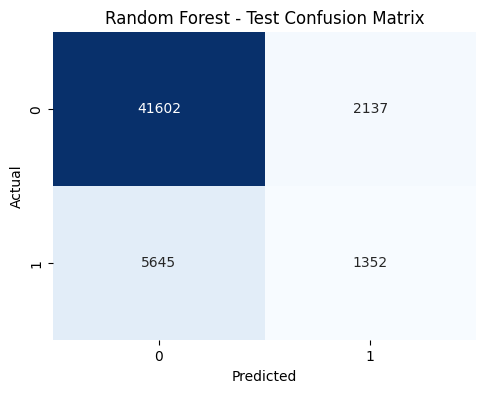

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_train_pred_rf = random_forest_model.predict(X_train)
y_test_pred_rf = random_forest_model.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Model:")
print("- Train Accuracy: {:.4f}".format(train_accuracy_rf))
print("- Test Accuracy: {:.4f}\n".format(test_accuracy_rf))

# Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

XGBoost Model:
- Train Accuracy: 0.8692
- Test Accuracy: 0.8648



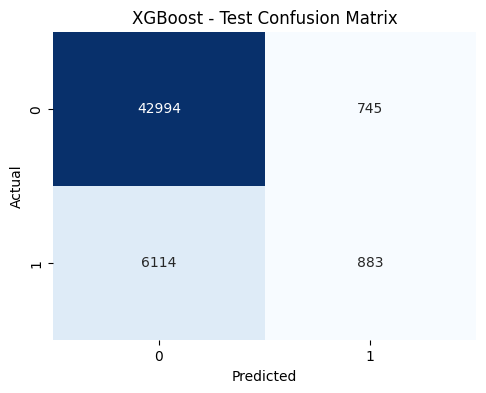

In [36]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost Model:")
print("- Train Accuracy: {:.4f}".format(train_accuracy_xgb))
print("- Test Accuracy: {:.4f}\n".format(test_accuracy_xgb))

# Confusion Matrix
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Voting Classifier:
- Train Accuracy: 0.8790
- Test Accuracy: 0.8644



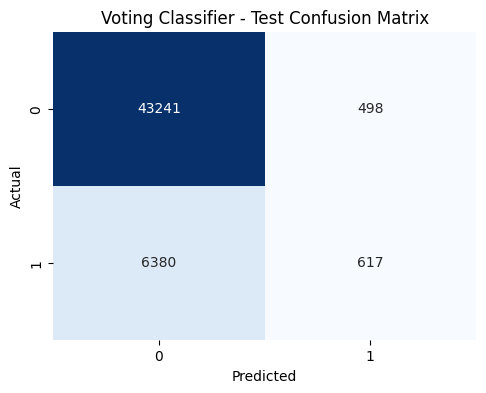

In [38]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('decision_tree', dt_model),
        ('random_forest', random_forest_model),
        ('xgboost', xgb_model)
    ],
    voting='hard'  # Change to 'soft' for soft voting
)

voting_classifier.fit(X_train, y_train)


y_train_pred_voting = voting_classifier.predict(X_train)
y_test_pred_voting = voting_classifier.predict(X_test)


train_accuracy_voting = accuracy_score(y_train, y_train_pred_voting)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)

print("Voting Classifier:")
print("- Train Accuracy: {:.4f}".format(train_accuracy_voting))
print("- Test Accuracy: {:.4f}\n".format(test_accuracy_voting))

# Confusion Matrix
cm_test_voting = confusion_matrix(y_test, y_test_pred_voting)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_voting, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Voting Classifier - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [51]:
#Predictor for single entry (USING XGBOOST MODEL)

#	HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, PhysHlth, DiffWalk, Sex, Age

new_data = np.array([[1,1,15,1,1,15,1,0,25]])

prediction = xgb_model.predict(new_data)

print(f'The predicted outcome is: {prediction}')


The predicted outcome is: [1]


In conclusion, our project involved training and evaluating four individual models (Logistic Regression, Decision Tree, Random Forest, and XGBoost) as well as a Voting Classifier that combined their predictions. The Logistic Regression and XGBoost models demonstrated competitive accuracy on both the training and test sets, showcasing a good balance between simplicity and performance. The Decision Tree and Random Forest models exhibited strong training accuracy, suggesting potential overfitting, while their test accuracies were slightly lower. The Voting Classifier, incorporating insights from multiple models, achieved a commendable accuracy, demonstrating the effectiveness of ensemble methods in enhancing predictive performance. It's crucial to consider factors such as model interpretability, computational efficiency, and the specific requirements of the application when selecting the most suitable model for deployment.

In future iterations, I plan to enhance the models by fine-tuning hyperparameters, conducting feature engineering, and exploring advanced ensemble techniques. Continuous improvement will be a key focus to maximize predictive accuracy and ensure the robustness of the models in diverse scenarios.